# ACSE-7 (Optimisation & Inversion) <a class="tocSkip">

## Coursework part A

_Expected completion time:_
- A1: 30 minutes
- A2: 1 hour
- A3: 1-2 hours

# Question A1

Consider a linear inversion problem written in the form 

$$G\boldsymbol{m} = \boldsymbol{d}.$$

The following four mathematical expressions give possible solutions to this problem


1. $\boldsymbol{m} =  G^+\boldsymbol{d},$


2. $\boldsymbol{m} = G^T(GG^T)^{-1}\boldsymbol{d},$


3. $\boldsymbol{m} = G^{-1}\boldsymbol{d},$


4. $\boldsymbol{m} = (G^T G)^{-1} G^T  \boldsymbol{d},$


For each of these approaches explain in words what type of inversion problem the approach can be used to solve, what properties the corresponding solution will possess, and any potential issues that might arise when attempting to utilise this solution approach.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint
import scipy.interpolate as si

### Answer of A1

#### A1.1
##### What type of inversion problem the approach can be used to solve?

- it can be used to solve the mixed-determined problems especially when the measurements are noisy(this means that the data is imperfact which can make there is no model that fit the data exactly), and the generalised inverse is preferable in  small problems.in addition, it can be used to solve any linear inverse.


##### What properties the corresponding solution will possess?

- the solution can provide a better fit of data than the least-squares fit and the minimal-norm solution. it may the most appropriate solution without additional information.

##### Any potential issues that might arise when attempting to utilise this solution approach?

- The generalised inverse is expensive to compute (which is why the algebraic expressions in the case of a full rank matrix are useful) - the SVD calculation is expensive for large matrices and in practical terms it is impossible to use for the largest inverse problems.   

- Although  it  is  able  to  deal  with  zero-valued  singular  values  and  does  not  suffer  from problems when matrices are singular, it has no protection against very small singular values or very small eigenvalues that may be practically indistinguishable from zero when using finite-precision arithmetic.  If the ratio of the largest to the smallest singular value is very large, then the system will be very *ill-conditioned*.  These small singular values will dominate the generalised inverse because they are reciprocated and become very large when calculating the inverse of $\Sigma$.  In real datasets, small singular values and small eigenvalues will  typically be dominated by noise.  The generalised inverse then will act to amplify noise in the data,  and  in  very  poorly  conditioned  problems,  the  resulting  model  may  be  entirely dominated  by  noise  -  the  model  will  fit  the  data  and  have  a  minimum  norm,  but  it  will nonetheless be nonsense!

- Most  real  inverse  problems  are  non-linear,  and  the  generalised  inverse  only  solves  linear problems.  While the generalised inverse could be used iteratively to solve a linearised form of the non-linear problem, it is likely to be overkill for that approach.  When we iterate to solve a non-linear problem, we generally do not need an exact and hence expensive solution at each step,  we just need a reasonable solution that improves the model, and then iteration will take care  of the rest.  In linearised inversion, the linear problem that we solve at each step is not the  correct problem, it is just an approximation to it - consequently it is not sensible to spend  huge effort to get an exact solution to what is only an approximation to the true problem.  



#### A1.2
##### What type of inversion problem the approach can be used to solve?

- It can be used to solve the under-determined problems 


##### What properties the corresponding solution will possess?

- The solution can provide a perfect fit of data and satisfy that constraint then minimises the $L^2$ norm of the model.
- This problem has a null space since we have fewer equations than unknowns, and an infinite number of solutions will  satisfy the data equally well, and we can choose to add to it any linear combination from the null space and it will still explain the data exactly. 
- This is not the only exact solution 

##### Any potential issues that might arise when attempting to utilise this solution approach?
- this solution is not unique, and we can get many solutions that satisfy the model.

#### A1.3
##### What type of inversion problem the approach can be used to solve?

- It can be used to solve equi-determined problems - square linear systems


##### What properties the corresponding solution will possess?

- The solution can provide a perfect fit of data when G is singular.
- this problem only has one solution when G is singular, otherwise, no solution exist.
- this solution is a exact mathematical solution 

##### Any potential issues that might arise when attempting to utilise this solution approach?

- if the data contains uncertainties, these uncertainties will always influence the solution, and the solution can not provide a good estimate of the true model when noisy exist.
- when G is singular, there is no solution for this problem. In these circumstances, there are two possibilities: either the equations are not independent in which case there will be  infinitely many solutions that exactly fit the data, or the equations are incompatible/inconsistent in which case there will be no solution at all that exactly fits the data. 

#### A1.4
##### What type of inversion problem the approach can be used to solve?

- It can be used to solve the over-determined problems 


##### What properties the corresponding solution will possess?

- The solution can provide a good fit of data and satisfy that constraint then minimises the $L^2$ norm of the model.


##### Any potential issues that might arise when attempting to utilise this solution approach?
- in general, there is no solution, we can only use least-squares to minimize the error 

# Question A2

Consider the rectangular matrix

$$G = 
\begin{pmatrix}
2 & 2 & 10 & 10 \\
2 & 3 & 14 & 12 \\
4 & 5 & 24 & 22 
\end{pmatrix}.
$$

Convert this matrix into reduced-row-echelon form. 

What is the rank of this matrix? What dimensions are its range and its null space?

Find the appropriate number of vectors which can be used as a basis to span the null space.

Now consider the data vector
$$\boldsymbol{d} = \begin{pmatrix}
26 \\
30\\
56
\end{pmatrix}.$$


Use the pseudo-inverse (you may make use of `np.linalg.pinv`) to find a solution to the problem $G\boldsymbol{m}=\boldsymbol{d}$.

Demonstrate though some examples that adding any multiples of the vectors spanning the null space to this solution (i.e. adding any vector from within the null space) also provides a valid solution to this problem.

Demonstrate that the solution obtained using the pseudo-inverse is the minimal norm solution to this problem.

### Solution 

- Convert this matrix into reduced-row-echelon form

The RREF is

$$
\begin{pmatrix}
1 & 0 & 1 & 3 \\
0 & 1 & 4 & 2 \\
0 & 0 & 0 & 0 
\end{pmatrix}
$$

- What is the rank of this matrix? What dimensions are its range and its null space?

This is formed of two linearly independent columns  (and equivalently  of  only  two independent rows) so its rank is 2. This is less that the minimum of $m$ and $n$ and so the matrix is not full rank.

Now consider the augmented matrix representing three linear equations in four unknowns (the RHS vector is all zero)

There are 2 independent columns, so the dimensions of range is 2.

$$
\left(
  \begin{array}{cccc|c}
2 & 2 & 10 & 10 & 0 \\
2 & 3 & 14 & 12 & 0 \\
4 & 5 & 24 & 22 & 0 
  \end{array}
\right)$$

The RREF is

$$
\left(
  \begin{array}{cccc|c}
1 & 0 & 1 & 3 & 0 \\
0 & 1 & 4 & 2 & 0 \\
0 & 0 & 0 & 0 & 0
  \end{array}
\right)$$

so any vector for which $m_1 + m_2 + 5m_3 + 5m_4=0$ and $m_2 + 4m_3 + 2m_4=0$
will be a solution of $G\boldsymbol{m} = \boldsymbol{0}$ 
and thus will lie in the null space of $G$.

If we chose arbitrary values for the variables that appear more than once, say $m_3 = \alpha$ and $m_4 = \beta$, then we obtain $m_1 = -\alpha - 3\beta$ and $m_2=-4\alpha-2\beta$.

Therefore note that the solution for $m$ in the null space can be written as

$$\boldsymbol{m} = \alpha 
\begin{pmatrix}
-1 \\
-4\\
1\\
0
\end{pmatrix} 
+\beta
\begin{pmatrix}
-3 \\
-2\\
0\\
1
\end{pmatrix} 
$$

That is, any vector in the null space of $G$ can be written as a linear combination of the two 
vectors above.  This null space is a two-dimensional plane within $\mathbb{R}^4$.
The null space thus  forms a sub-space of  $\mathbb{R}^4$.

Note that the number of independent vectors that must be linearly combined to form the null 
space is equal to the number of non-pivot columns in the RREF,   
**and these two vector above are basis spanning set for the nullspace $G$**

- Use the pseudo-inverse (you may make use of `np.linalg.pinv`) to find a solution to the problem $G\boldsymbol{m}=\boldsymbol{d}$.

In [2]:

G = np.array([[2,2,10,10],
              [2,3,14,12],
              [4,5,24,22]])
print(sl.det(G.T@G))
print(sl.det(G@G.T))

0.0
0.0


In [3]:
G = np.array([[2,2,10,10],
              [2,3,14,12],
              [4,5,24,22]])
d = np.array([26,30,56])
U, S, VT = sl.svd(G,full_matrices=False)

pprint(np.allclose(G, U @ np.diag(S) @ VT))

pprint(S)
# note that there are only two non-zero entries, so p=2
p=2
# form the compact SVD
Sp = S[:p]
# and form the corresponding diagonal matrix
SSp = np.diag(Sp)
# pull out first p columns to find the compact form and U and V
Up = U[:,:p]
Vp = VT.T[:,:p]

# check our compacg SVD
pprint(np.allclose(G, Up @ SSp @ Vp.T))

invGgen = Vp @ sl.inv(SSp) @ Up.T

pprint(np.allclose(invGgen, np.linalg.pinv(G)))


m = invGgen @ d
pprint(m)

True
array([4.07560255e+01, 9.72824380e-01, 9.76441233e-17])
True
True
array([ 1.13740458, -0.35114504, -0.26717557,  2.70992366])


- Demonstrate though some examples that adding any multiples of the vectors spanning the null space to this solution (i.e. adding any vector from within the null space) also provides a valid solution to this problem.



Now consider the problem $G\boldsymbol{m}=\boldsymbol{d}$ where

$$\boldsymbol{d} = \begin{pmatrix}
26 \\
30\\
56
\end{pmatrix} $$

The RREF is

$$
\left(
  \begin{array}{cccc|c}
1 & 0 & 1 & 3 & 9 \\
0 & 1 & 4 & 2 & 4 \\
0 & 0 & 0 & 0 & 0 
  \end{array}
\right)$$

One particular solution to this is 

$$\boldsymbol{x}_{\text{part}} = \begin{pmatrix}
3 \\
0\\
0 \\
2
\end{pmatrix} $$

We can add  any vector from the null space and by linearity it will be another solution, e.g.
$$\boldsymbol{x} =
\begin{pmatrix}
3 \\
0\\
0 \\
2
\end{pmatrix}
+
\begin{pmatrix}
-1 \\
-4\\
1\\
0
\end{pmatrix} 
+
\begin{pmatrix}
-3 \\
-2\\
0\\
1
\end{pmatrix}
=
\begin{pmatrix}
-1 \\
-6\\
1\\
3
\end{pmatrix}$$

So the presence of a null space leads to non-uniqueness of solutions.

- Demonstrate that the solution obtained using the pseudo-inverse is the minimal norm solution to this problem.

True


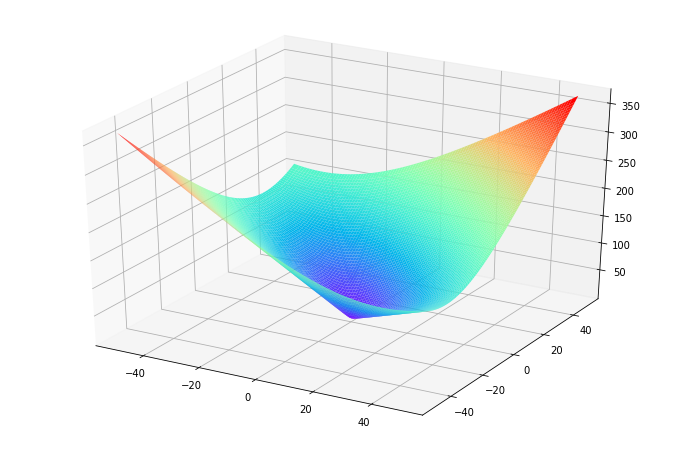

In [4]:
from numpy import linalg as nla
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# the basis vectors
n_1 = np.array([-1, -4, 1, 0])
n_2 = np.array([-3, -2, 0, 1])

# add on a multiple and check it's still a solution
mult_1 = 1.
mult_2 = 1.

x_p = m + mult_1*n_1 +mult_2*n_2

print(np.allclose(d, G@x_p))


# is m the minimum norm solution?

# plot the norm of the vectors we get by adding on multiples of the basis vectors

fig = plt.figure(1, figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_top_view()

mult_1 = np.linspace(-50,50,100,dtype=int)
mult_2= np.linspace(-50,50,100,dtype=int)
x, y = np.meshgrid(mult_1, mult_2)
norms = np.zeros((100,100))
for i,m_1 in enumerate(mult_1):
    for j,m_2 in enumerate(mult_2):
        norms[i][j] = nla.norm(m + n_1*m_1 + n_2*m_2)
ax.plot_surface(x, y, norms, rstride=1, cstride=1, cmap='rainbow')
plt.show()
# as we hoped for the norm is at a minimum when the multiplier is zero!

In [5]:
##check whether we get the minimum norm when the multiplier is zero
index = np.unravel_index(norms.argmin(), norms.shape)
print(index)
print((mult_1[index[0]]==0)and (mult_2[index[1]]==0))

(49, 49)
True


# Question A3

Recall the lecture 1 homework exercise where we used SVD to perform image compression (or low rank approximation of the corresponding matrix representing the grey scale version of the image) on a photo of our building.

Explain why the sum of the first $n$ singular values, as a fraction of the sum of all the singular values, can be used as a useful metric for how well the information in the image is represented by the low rank approximation.

For the Royal School of Mines image plot a cumulative sum of the singular values as a fraction of the sum of all singular values - how fast this fraction gets close to one can be used as a guide for how easy the image is to compress.

Try and find two additional images for which different behaviour in the cumulative sums of singular values plots can be seen - comment on what you observe.  [Note that flags are nice examples of images that can be relatively simple - consider using your home flag, or others that might be especially simple designs].

- Explain why the sum of the first $n$ singular values, as a fraction of the sum of all the singular values, can be used as a useful metric for how well the information in the image is represented by the low rank approximation.


When compressing the image, the sum is not performed to the very last SVs, the SVs with small enough values are dropped. (Remember that the SVs are ordered on the diagonal.). In addition, the singular values of a matrix decrease quickly with increasing rank. This propriety allows us to reduce the noise or compress the matrix data by eliminating the small singular values or the higher ranks. We can just choose the first n sigular values to drop the samll sigular values which can almost not effect the figure's pixel, but we lost some detials of this figure.

- For the Royal School of Mines image plot a cumulative sum of the singular values as a fraction of the sum of all singular values - how fast this fraction gets close to one can be used as a guide for how easy the image is to compress.

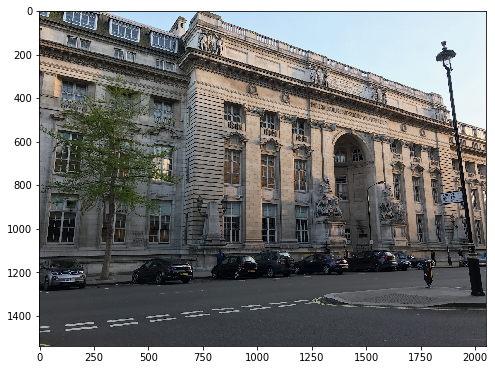

In [6]:
# PIL = Python Imaging Library
from PIL import Image
img_colour = Image.open('./figure/Imperial_College_Royal_School_of_Mines.jpg')
# convert to grey scale
img_grey = img_colour.convert('LA')
# what does LA mean? ... https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes

fig = plt.figure(figsize=(8, 12))
ax1 = fig.add_subplot(111)
ax1.imshow(img_colour)

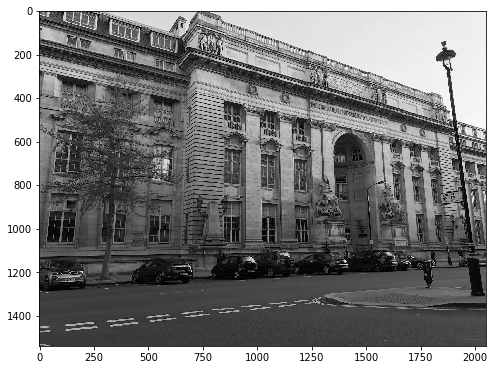

In [7]:
# as we converted to grey scale, we can represent 
# the image via a matrix with entries representing 
# pixels and the corresponding value representing
# a shade of grey between black and white

# use getdata, first band - https://www.geeksforgeeks.org/python-pil-image-getdata/
img_mat = np.array(img_grey.getdata(band=0), float)
# turn into matrix of the correct shape
img_mat.shape = (img_grey.size[1], img_grey.size[0])

fig = plt.figure(figsize=(8, 12))
ax1 = fig.add_subplot(111)
# plot using a gray colormap
ax1.imshow(img_mat, cmap='gray')

In [8]:
# find the SVD
U, sigma, VT = np.linalg.svd(img_mat)
print('np.shape(U):', np.shape(U))
print('np.shape(sigma):', np.shape(sigma))
print('np.shape(VT):', np.shape(VT))
# asterisk to unpack the list of sigmas for nicer printing with the use of sep
print('\nFirst 5 singular values:', *list(sigma[:5]), sep='\n')
print('\nLast 5 singular values:', *list(sigma[-5:]), sep='\n')

np.shape(U): (1537, 1537)
np.shape(sigma): (1537,)
np.shape(VT): (2049, 2049)

First 5 singular values:
199880.16222999114
27859.01669435243
23722.20155782134
19130.247921504182
17003.27567954972

Last 5 singular values:
14.46243326271623
13.919214265779544
13.433145151244423
13.148528484679625
12.487521319634652


In [9]:
total_sigma = sigma.sum()

Text(0.5, 1.0, 'The proportion of fraction to total sum of sigular values ')

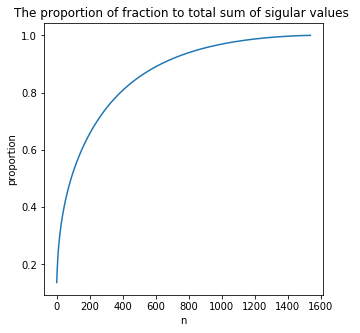

In [10]:
temp_sigma = []
for i in range(1,np.shape(sigma)[0]+1):
    # restrict the number of singular values considered
    temp_sigma.append(sigma[:i].sum()/total_sigma)
#     print(temp_sigma[i-1])
x = np.linspace(1,np.shape(sigma)[0]+1,np.shape(sigma)[0],dtype=int)
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x,temp_sigma)
ax1.set_xlabel('n')
ax1.set_ylabel('proportion')
ax1.set_title('The proportion of fraction to total sum of sigular values ')

- Try and find two additional images for which different behaviour in the cumulative sums of singular values plots can be seen - comment on what you observe.  [Note that flags are nice examples of images that can be relatively simple - consider using your home flag, or others that might be especially simple designs].

In [11]:
# PIL = Python Imaging Library
from PIL import Image
def get_mat(path,imag_show = False):
    img_colour = Image.open(path)
    # convert to grey scale
    img_grey = img_colour.convert('LA')
    img_mat = np.array(img_grey.getdata(band=0), float)
    # turn into matrix of the correct shape
    img_mat.shape = (img_grey.size[1], img_grey.size[0])
    if imag_show:
        fig = plt.figure(figsize=(8, 12))
        ax1 = fig.add_subplot(111)
        # plot using a gray colormap
        ax1.imshow(img_mat, cmap='gray')
    return img_mat

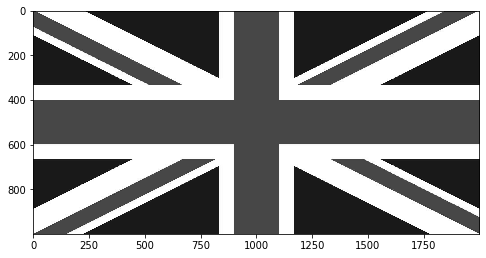

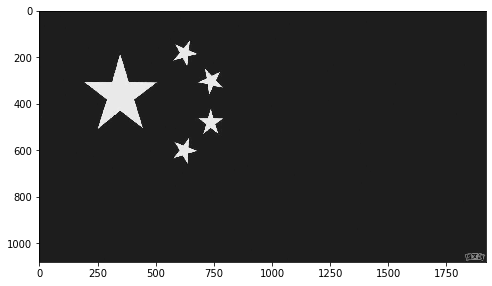

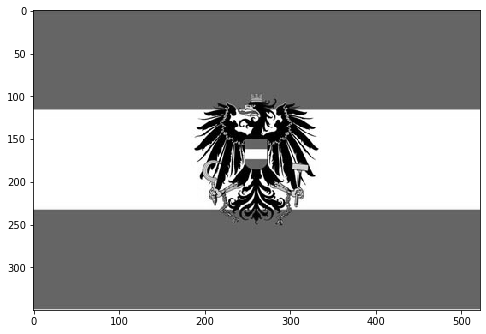

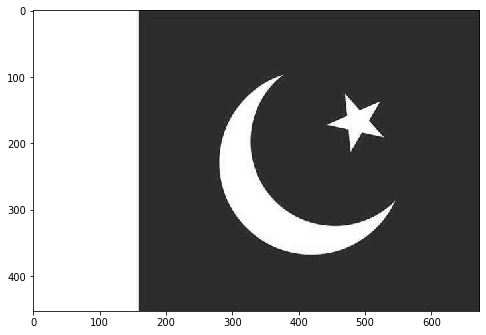

In [52]:
mat_1 = get_mat('./figure/flag_4.jpg',True)
mat_2 = get_mat('./figure/flag_3.jpg',True)
mat_3 = get_mat('./figure/flag_5.jpg',True)
mat_4 = get_mat('./figure/flag_2.jpg',True)

In [53]:
def get_usv(img_mat):
    U, sigma, VT = np.linalg.svd(img_mat)
    total_sigma = sigma.sum()
    temp_sigma = []
    for i in range(1,np.shape(sigma)[0]+1):
        # restrict the number of singular values considered
        temp_sigma.append(sigma[:i].sum()/total_sigma)
    #     print(temp_sigma[i-1])
    x = np.linspace(1,np.shape(sigma)[0]+1,np.shape(sigma)[0],dtype=int)
    fig = plt.figure(figsize=(5, 5))
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.plot(x,temp_sigma)
    ax1.set_xlabel('n')
    ax1.set_ylabel('proportion')
    ax1.set_title('The proportion of fraction to total sum of sigular values ')

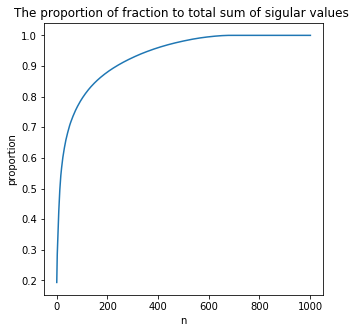

In [54]:
get_usv(mat_1)

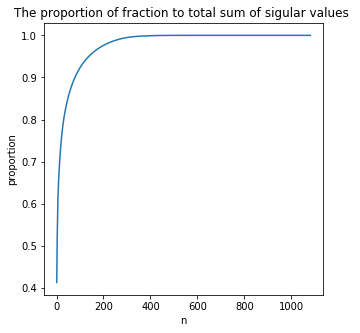

In [55]:
get_usv(mat_2)

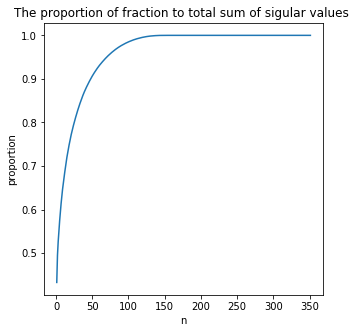

In [56]:
get_usv(mat_3)

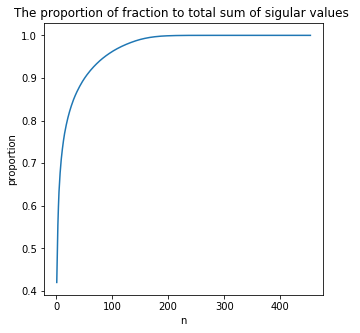

In [57]:
get_usv(mat_4)

In [58]:
def get_plot(img_mat):
    U, sigma, VT = np.linalg.svd(img_mat)
    total_sigma = sigma.sum()
    temp_sigma = []
    for i in range(1,np.shape(sigma)[0]+1):
        # restrict the number of singular values considered
        temp_sigma.append(sigma[:i].sum()/total_sigma)
    #     print(temp_sigma[i-1])
    x = np.linspace(1,np.shape(sigma)[0]+1,np.shape(sigma)[0],dtype=int)
    return x,temp_sigma

Text(0.5, 1.0, 'The proportion of fraction to total sum of sigular values ')

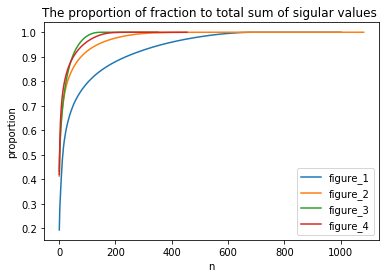

In [59]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(get_plot(mat_1)[0],get_plot(mat_1)[1],label='figure_1')
ax.plot(get_plot(mat_2)[0],get_plot(mat_2)[1],label='figure_2')
ax.plot(get_plot(mat_3)[0],get_plot(mat_3)[1],label='figure_3')
ax.plot(get_plot(mat_4)[0],get_plot(mat_4)[1],label='figure_4')
ax.legend()
ax.set_xlabel('n')
ax.set_ylabel('proportion')
ax.set_title('The proportion of fraction to total sum of sigular values ')

Both of them in a certain scale(from 0 to n), the proportion is increasing rapidly,and then it raises slowly until to 1. Therefore,we can proof that the sum of the first $n$ singular values, as a fraction of the sum of all the singular values, can be used as a useful metric for how well the information in the image is represented by the low rank approximation.However,for different figures the length of n is totally different if we want to use the sum of the first $n$ sigular values to represent the sum of all the sigular values.